In [4]:
import numpy as np
a=1
b=2
print(a+b)

3


In [4]:
# %load dog_cat_class.py
#!usr/bin/env python
"""
@Author  : zhaoguanhua
@Email   : zhaogh@hdsxtech.com
@Time    : 2020/4/22 22:20
@File    : dog_cat_class.py
@Software: PyCharm
"""
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

def dog_cat_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512,activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))

    model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

    return model

train_dir =r"/home/zhaoguanhua/keras_data/test_model/train"
validation_dir=r"/home/zhaoguanhua/keras_data/test_model/validation"

#数据预处理
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(150,150),batch_size=20,class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,target_size=(150,150),batch_size=20,class_mode='binary'
)

model =dog_cat_model()
# print(model.summary())

callbacks=[
    keras.callbacks.TensorBoard(
    log_dir='my_log_dir')
]

history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,
                              validation_steps=50,callbacks=callbacks)

model.save('cat_dog_small.h5')




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 12s 124ms/step - loss: 0.6897 - acc: 0.5370 - val_loss: 0.6732 - val_acc: 0.5420
Epoch 2/30
100/100 [==============================] - 11s 112ms/step - loss: 0.6588 - acc: 0.6070 - val_loss: 0.6414 - val_acc: 0.6300
Epoch 3/30
100/100 [==============================] - 11s 111ms/step - loss: 0.6135 - acc: 0.6605 - val_loss: 0.6067 - val_acc: 0.6600
Epoch 4/30
100/100 [==============================] - 11s 111ms/step - loss: 0.5719 - acc: 0.7065 - val_loss: 0.6093 - val_acc: 0.6630
Epoch 5/30
100/100 [==============================] - 11s 111ms/step - loss: 0.5371 - acc: 0.7310 - val_loss: 0.5861 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 11s 111ms/step - loss: 0.5180 - acc: 0.7380 - val_loss: 0.5974 - val_acc: 0.6780
Epoch 7/30
100/100 [==============================] - 11s 112ms/step - loss: 0.4905 - acc: 0.7615 - val_lo

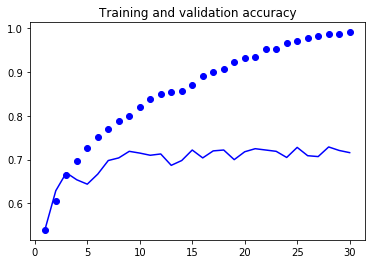

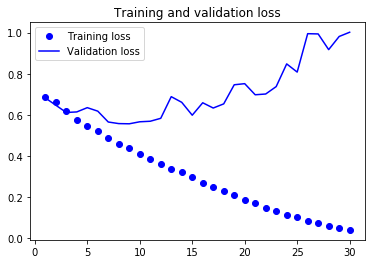

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

/home/zhaoguanhua/keras_data/test_model/train/cats/cat.100.jpg


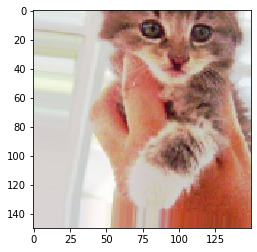

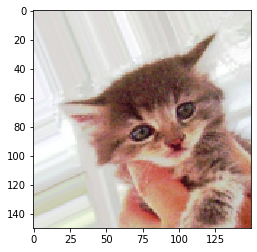

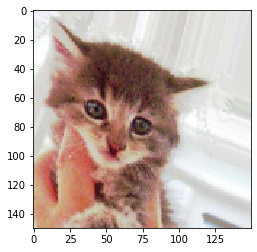

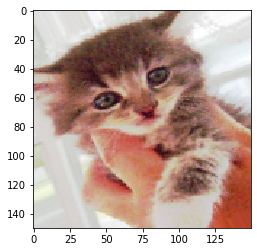

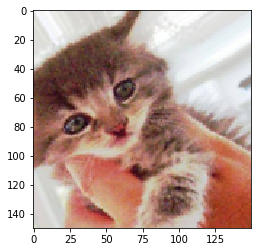

In [37]:
from keras.preprocessing import image
import os

datagen=ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_cats_dir="/home/zhaoguanhua/keras_data/test_model/train/cats"
fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
print(img_path)
img= image.load_img(img_path,target_size=(150,150))
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%5==0:
        break
plt.show()

In [41]:
#定义一个增加dropout的新卷积神经网络
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

#数据增强
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,
                                  zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
        train_dir,target_size=(150,150),batch_size=32,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,target_size=(150,150),batch_size=32,class_mode='binary')

history=model.fit_generator(
         train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,
         validation_steps=50)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 31s 305ms/step - loss: 0.6940 - acc: 0.5472 - val_loss: 0.6823 - val_acc: 0.5247
Epoch 2/100
100/100 [==============================] - 27s 273ms/step - loss: 0.6664 - acc: 0.5853 - val_loss: 0.6359 - val_acc: 0.6256
Epoch 3/100
100/100 [==============================] - 28s 276ms/step - loss: 0.6411 - acc: 0.6166 - val_loss: 0.6046 - val_acc: 0.6643
Epoch 4/100
100/100 [==============================] - 27s 275ms/step - loss: 0.6256 - acc: 0.6453 - val_loss: 0.5927 - val_acc: 0.6772
Epoch 5/100
100/100 [==============================] - 27s 272ms/step - loss: 0.6087 - acc: 0.6544 - val_loss: 0.5973 - val_acc: 0.6821
Epoch 6/100
100/100 [==============================] - 27s 273ms/step - loss: 0.5937 - acc: 0.6797 - val_loss: 0.6239 - v

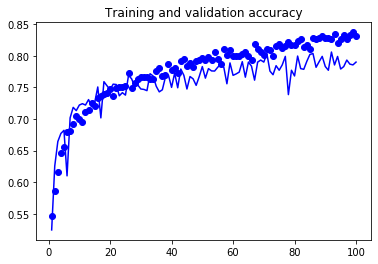

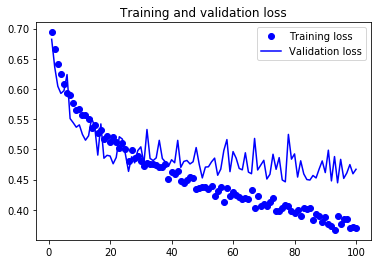

In [44]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [49]:
from keras.applications import VGG16

conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))
print(conv_base.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [54]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir ="/home/zhaoguanhua/keras_data/test_model"
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory,sample_count):
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='binary')
    i=0
    
    for inputs_batch,labels_batch in generator:
        feature_batch = conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size]=feature_batch
        labels[i*batch_size:(i+1)*batch_size]=labels_batch
        i+=1
        if i*batch_size>=sample_count:
            break
    
    return features,labels

train_features,train_labels = extract_features(train_dir,2000)
validation_features,validation_labels = extract_features(validation_dir,1000)
test_features,test_labels =extract_features(test_dir,1000)

train_features = np.reshape(train_features,(2000,4*4*512))
validation_features = np.reshape(validation_features,(1000,4*4*512))
test_features = np.reshape(test_features,(1000,4*4*512))

from keras import layers
from keras import models
from keras import optimizers

model =models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])

history = model.fit(train_features,train_labels,epochs=30,batch_size=20,
                    validation_data=(validation_features,validation_labels))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 518us/step - loss: 0.6291 - acc: 0.6495 - val_loss: 0.4395 - val_acc: 0.8380
Epoch 2/30
2000/2000 [==============================] - 1s 300us/step - loss: 0.4298 - acc: 0.8075 - val_loss: 0.3570 - val_acc: 0.8730
Epoch 3/30
2000/2000 [==============================] - 1s 299us/step - loss: 0.3592 - acc: 0.8495 - val_loss: 0.3168 - val_acc: 0.8820
Epoch 4/30
2000/2000 [==============================] - 1s 297us/step - loss: 0.3124 - acc: 0.8685 - val_loss: 0.2974 - val_acc: 0.8870
Epoch 5/30
2000/2000 [==============================] - 1s 295us/step - loss: 0.2896 - acc: 0.8830 - val_loss: 0.2822 - val_acc: 0.8920
Epoch 6/30
2000/2000 [==============================] - 1s 301us/step - loss: 0.2630 - acc: 0.8945 - val_loss: 0.2739 - val_acc: 0.8920
Epoch 7/30

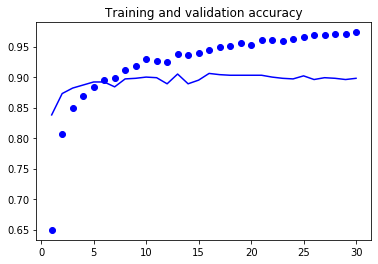

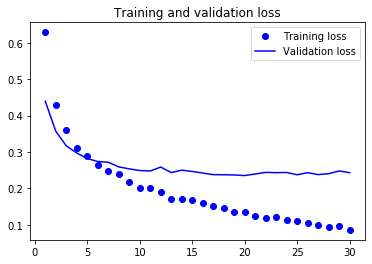

In [55]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [65]:
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16

conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

model1 = models.Sequential()
model1.add(conv_base)
model1.add(layers.Flatten())
model1.add(layers.Dense(256,activation='relu'))
model1.add(layers.Dense(1,activation='sigmoid'))

print(model1.summary())
conv_base.trainable=False

#数据增强
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,
                                  zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
        train_dir,target_size=(150,150),batch_size=20,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

model1.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])

history = model1.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,
                              validation_steps=50)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________
None
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 20s 197ms/step - loss: 0.5935 - acc: 0.6850 - val_loss: 0.4790 - val_acc: 0.7750
Epoch 2/30
100/100 [==================

In [59]:
print(train_dir)

/home/zhaoguanhua/keras_data/test_model/train


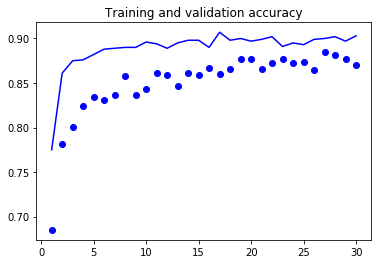

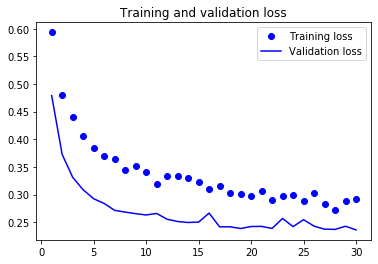

In [66]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [70]:
import tensorflow as tf

os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
conv_base.trainable=True

set_trainable = False
for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable =True
    else:
        layer.trainable=False
                              
model1.compile(optimizer=optimizers.RMSprop(lr=1e-5),loss='binary_crossentropy',metrics=['acc'])

history = model1.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 20s 198ms/step - loss: 0.1121 - acc: 0.9590 - val_loss: 0.1642 - val_acc: 0.9370
Epoch 2/100
100/100 [==============================] - 18s 179ms/step - loss: 0.0933 - acc: 0.9660 - val_loss: 0.3123 - val_acc: 0.9130
Epoch 3/100
100/100 [==============================] - 18s 180ms/step - loss: 0.1055 - acc: 0.9630 - val_loss: 0.1798 - val_acc: 0.9340
Epoch 4/100
100/100 [==============================] - 18s 178ms/step - loss: 0.0881 - acc: 0.9675 - val_loss: 0.1907 - val_acc: 0.9310
Epoch 5/100
100/100 [==============================] - 18s 183ms/step - loss: 0.0999 - acc: 0.9630 - val_loss: 0.1869 - val_acc: 0.9260
Epoch 6/100
100/100 [==============================] - 18s 178ms/step - loss: 0.0821 - acc: 0.9650 - val_loss: 0.1777 - val_acc: 0.9440
Epoch 7/100
100/100 [==============================] - 18s 182ms/step - loss: 0.0754 - acc: 0.9730 - val_loss: 0.2408 - val_acc: 0.9270
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 18s 181ms/step - loss: 0.0297 - acc: 0.9900 - val_loss: 0.2743 - val_acc: 0.9270
Epoch 62/100
100/100 [==============================] - 19s 186ms/step - loss: 0.0164 - acc: 0.9920 - val_loss: 0.3282 - val_acc: 0.9210
Epoch 63/100
100/100 [==============================] - 18s 182ms/step - loss: 0.0208 - acc: 0.9935 - val_loss: 0.3107 - val_acc: 0.9360
Epoch 64/100
100/100 [==============================] - 18s 181ms/step - loss: 0.0227 - acc: 0.9910 - val_loss: 0.2290 - val_acc: 0.9360
Epoch 65/100
100/100 [==============================] - 18s 181ms/step - loss: 0.0283 - acc: 0.9915 - val_loss: 0.2657 - val_acc: 0.9380
Epoch 66/100
 78/100 [======================>.......] - ETA: 3s - loss: 0.0181 - acc: 0.9936

KeyboardInterrupt: 